# Importing Pandas and reading dataset

In [8]:
import pandas as pd
stock_data = pd.read_csv('Netflix_Dataset.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
04-03-2019,359.72,362.25,348.04,351.04,"74,86,996"
05-03-2019,351.46,356.17,348.25,354.30,"59,37,754"
06-03-2019,353.60,359.88,351.70,359.61,"62,11,895"
07-03-2019,360.16,362.86,350.50,352.60,"61,51,331"
08-03-2019,345.75,349.92,342.47,349.60,"68,98,838"


# Plotting Graph for High and Low

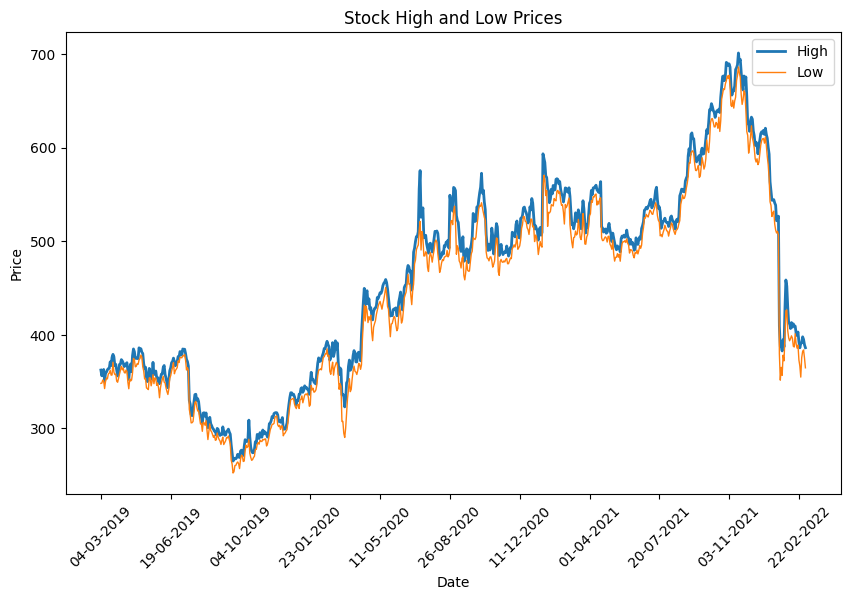

In [9]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['High'], label='High', linewidth=2)
plt.plot(stock_data['Low'], label='Low', linewidth=1)

# Adding labels and title
plt.title('Stock High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot
plt.show()


# Plotting Graph for Open and Close

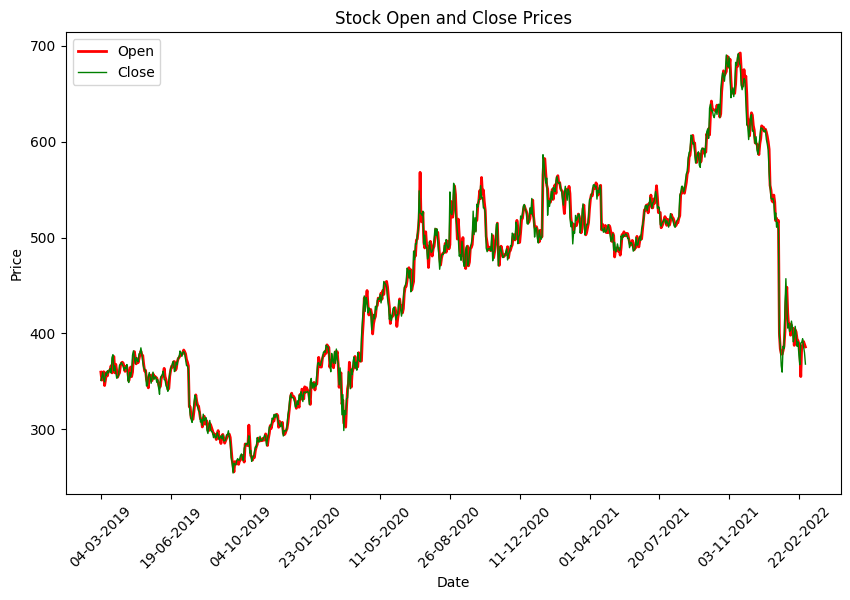

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Open'], label='Open', color='red', linewidth=2)
plt.plot(stock_data['Close'], label='Close', color='green', linewidth=1)

# Adding labels and title
plt.title('Stock Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot
plt.show()


# Importing Essential Libraries

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]

# Feature Scaling

In [ ]:
sc = StandardScaler()
stock_data_ft = sc.fit_transform(stock_data.values)
stock_data_ft = pd.DataFrame(columns=stock_data.columns,
                            data=stock_data_ft,
                            index=stock_data.index)

In [14]:
def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        # Extract a window of size `n_steps` for features
        X.append(data[i:i + n_steps, :-1])  # All but last column
        # Extract the `n_steps`-th target value
        y.append(data[i + n_steps - 1, -1])  # Target value (last column)
    return np.array(X), np.array(y)


In [15]:
X1, y1 = lstm_split(stock_data_ft.values, n_steps=1)
train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1. shape, X_train. shape, X_test.shape, y_test.shape)


(757, 1, 3) (606, 1, 3) (151, 1, 3) (151,)


# Defining the LSTM Model

In [16]:
# Define LSTM Model
lstm = Sequential()

# LSTM Layer (Set return_sequences=False if you want one output per sample)
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# Output Layer
lstm.add(Dense(1))

# Compile the Model
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print Model Summary
lstm.summary()

c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

# Fitting the Model

In [17]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/100
121/121 - 2s - 15ms/step - loss: 0.6080 - val_loss: 0.1947
Epoch 2/100
121/121 - 0s - 2ms/step - loss: 0.1724 - val_loss: 0.0167
Epoch 3/100
121/121 - 0s - 2ms/step - loss: 0.0136 - val_loss: 0.0087
Epoch 4/100
121/121 - 0s - 2ms/step - loss: 0.0129 - val_loss: 0.0086
Epoch 5/100
121/121 - 0s - 2ms/step - loss: 0.0126 - val_loss: 0.0086
Epoch 6/100
121/121 - 0s - 2ms/step - loss: 0.0124 - val_loss: 0.0087
Epoch 7/100
121/121 - 0s - 2ms/step - loss: 0.0123 - val_loss: 0.0088
Epoch 8/100
121/121 - 0s - 2ms/step - loss: 0.0122 - val_loss: 0.0089
Epoch 9/100
121/121 - 0s - 2ms/step - loss: 0.0121 - val_loss: 0.0089
Epoch 10/100
121/121 - 0s - 2ms/step - loss: 0.0121 - val_loss: 0.0090
Epoch 11/100
121/121 - 0s - 2ms/step - loss: 0.0121 - val_loss: 0.0090
Epoch 12/100
121/121 - 0s - 2ms/step - loss: 0.0120 - val_loss: 0.0090
Epoch 13/100
121/121 - 0s - 2ms/step - loss: 0.0120 - val_loss: 0.0090
Epoch 14/100
121/121 - 0s - 2ms/step - loss: 0.0120 - val_loss: 0.0089
Epoch 15/100
1

# Plotting the graph of Training Loss vs. Epochs

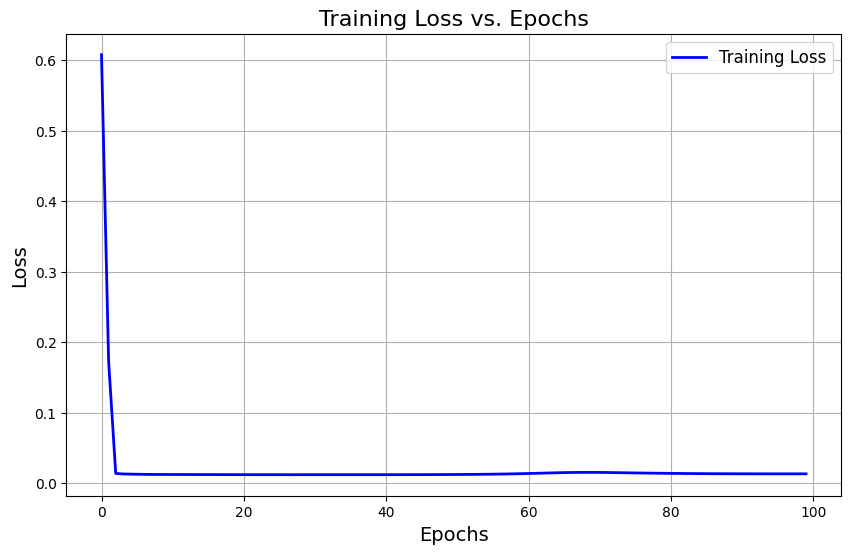

In [18]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Predicting the output

In [19]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [20]:
print(y_pred.shape)

(151, 1, 1)


# Plotting the graph of LSTM Predictions vs. True Values

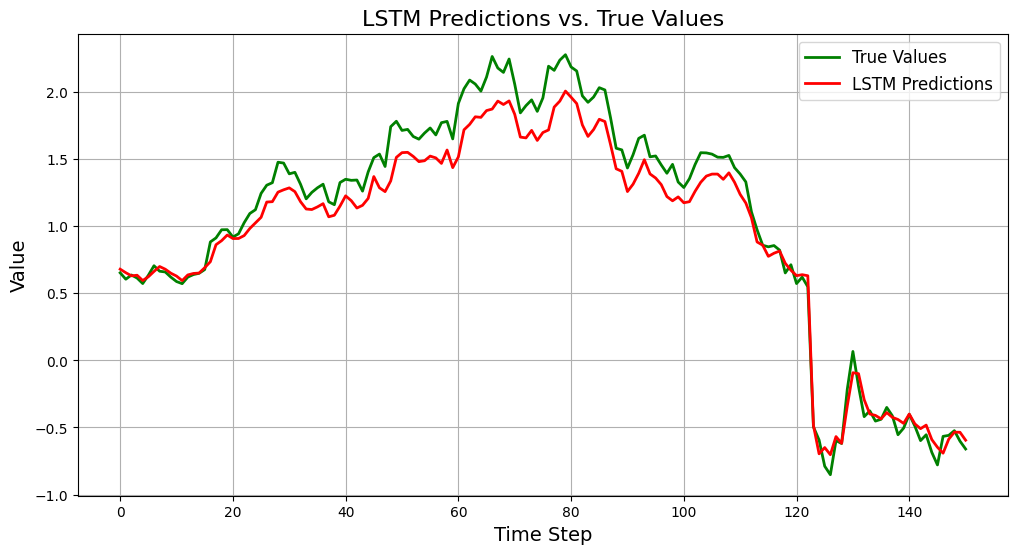

In [ ]:
#If n = 1
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()
y_pred_flat = y_pred.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred_flat, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [22]:
print(y_test.shape)

(151,)


# Calculating the MSE and RMSE

In [23]:
mse = mean_squared_error(y_test, y_pred_flat)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_flat)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.16934935984754793
MAPE:  0.12219421110916845


# Deeper LSTM with 50 units per layer


In [24]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
152/152 - 4s - 27ms/step - loss: 0.6995
Epoch 2/100
152/152 - 0s - 3ms/step - loss: 0.0641
Epoch 3/100
152/152 - 0s - 3ms/step - loss: 0.0225
Epoch 4/100
152/152 - 0s - 3ms/step - loss: 0.0185
Epoch 5/100
152/152 - 0s - 3ms/step - loss: 0.0154
Epoch 6/100
152/152 - 0s - 3ms/step - loss: 0.0132
Epoch 7/100
152/152 - 0s - 3ms/step - loss: 0.0117
Epoch 8/100
152/152 - 1s - 4ms/step - loss: 0.0106
Epoch 9/100
152/152 - 0s - 3ms/step - loss: 0.0095
Epoch 10/100
152/152 - 0s - 3ms/step - loss: 0.0087
Epoch 11/100
152/152 - 0s - 3ms/step - loss: 0.0080
Epoch 12/100
152/152 - 0s - 3ms/step - loss: 0.0074
Epoch 13/100
152/152 - 0s - 3ms/step - loss: 0.0069
Epoch 14/100
152/152 - 0s - 2ms/step - loss: 0.0065
Epoch 15/100
152/152 - 0s - 3ms/step - loss: 0.0061
Epoch 16/100
152/152 - 0s - 2ms/step - loss: 0.0057
Epoch 17/100
152/152 - 0s - 2ms/step - loss: 0.0054
Epoch 18/100
152/152 - 0s - 3ms/step - loss: 0.0052
Epoch 19/100
152/152 - 0s - 3ms/step - loss: 0.0049
Epoch 20/100
152/152

# Plotting the graph of Training Loss vs. Epochs

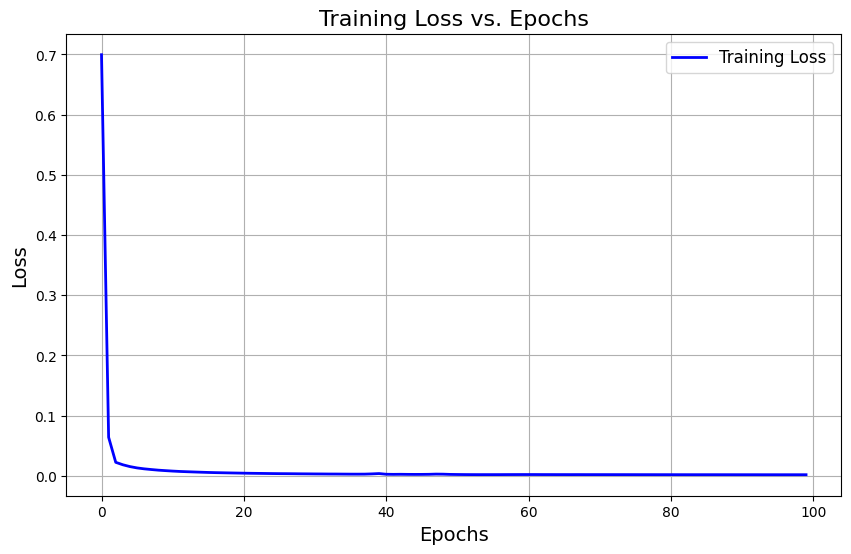

In [26]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Predicting the output

In [27]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


In [28]:
print(y_pred.shape)

(151, 1)


# Plotting the graph of LSTM Predictions vs. True Values

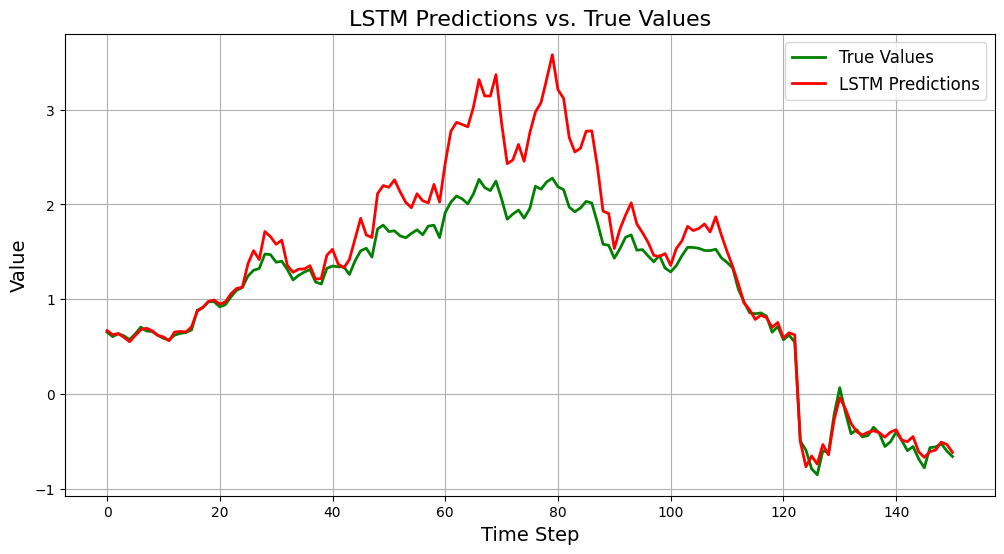

In [29]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


# Calculating the MSE and RSME

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.39484544595964727
MAPE:  0.1653341161214923


# Number of steps increased to 10


In [31]:
n_steps=10
X1, y1 = lstm_split(stock_data_ft.values, n_steps=n_steps)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)

(748, 10, 3) (599, 10, 3) (149, 10, 3) (149,) (149,)


In [32]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
150/150 - 5s - 31ms/step - loss: 0.1458
Epoch 2/100
150/150 - 1s - 8ms/step - loss: 0.0652
Epoch 3/100
150/150 - 1s - 7ms/step - loss: 0.0400
Epoch 4/100
150/150 - 1s - 8ms/step - loss: 0.0370
Epoch 5/100
150/150 - 1s - 9ms/step - loss: 0.0376
Epoch 6/100
150/150 - 1s - 9ms/step - loss: 0.0358
Epoch 7/100
150/150 - 2s - 10ms/step - loss: 0.0342
Epoch 8/100
150/150 - 1s - 9ms/step - loss: 0.0323
Epoch 9/100
150/150 - 2s - 10ms/step - loss: 0.0302
Epoch 10/100
150/150 - 2s - 11ms/step - loss: 0.0282
Epoch 11/100
150/150 - 1s - 8ms/step - loss: 0.0266
Epoch 12/100
150/150 - 1s - 10ms/step - loss: 0.0231
Epoch 13/100
150/150 - 1s - 8ms/step - loss: 0.0205
Epoch 14/100
150/150 - 1s - 10ms/step - loss: 0.0167
Epoch 15/100
150/150 - 2s - 11ms/step - loss: 0.0145
Epoch 16/100
150/150 - 1s - 9ms/step - loss: 0.0125
Epoch 17/100
150/150 - 1s - 9ms/step - loss: 0.0119
Epoch 18/100
150/150 - 1s - 10ms/step - loss: 0.0102
Epoch 19/100
150/150 - 1s - 9ms/step - loss: 0.0108
Epoch 20/100


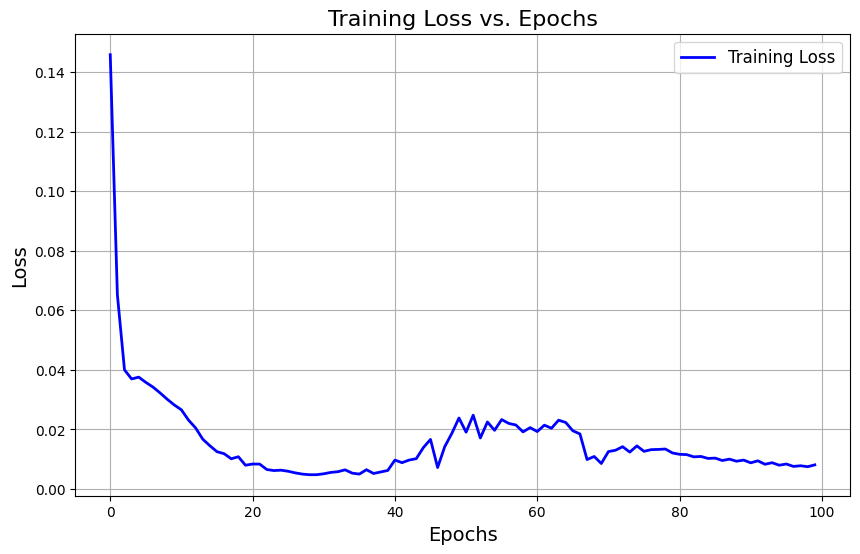

In [34]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [35]:
y_pred = lstm.predict(X_test)

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020D600FF7E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [36]:
print(y_pred.shape)

(149, 1)


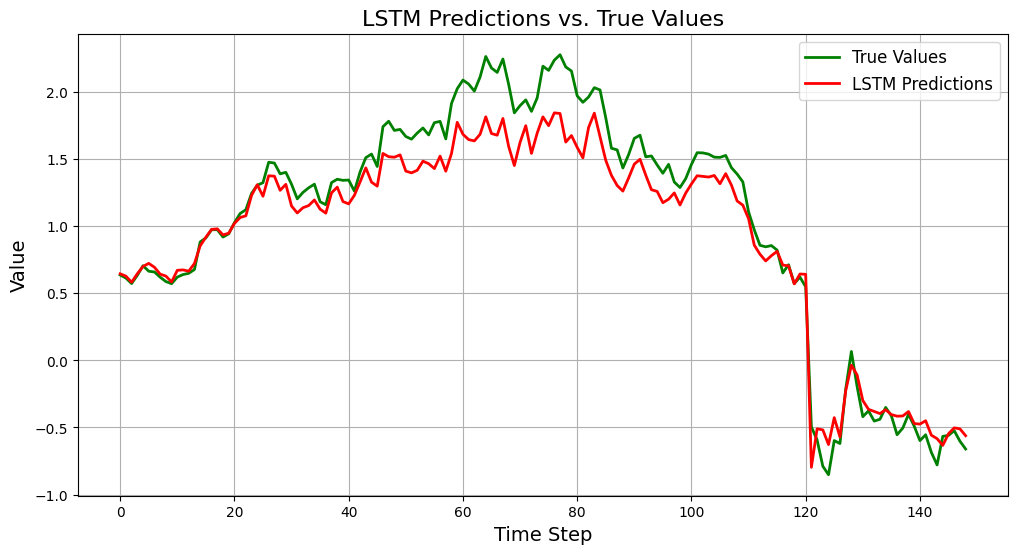

In [37]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.20876782243079817
MAPE:  0.12788308022341188


# Comparison with SMA and EMA

### SMA

Test RMSE: 100.354
Test MAPE: 0.163


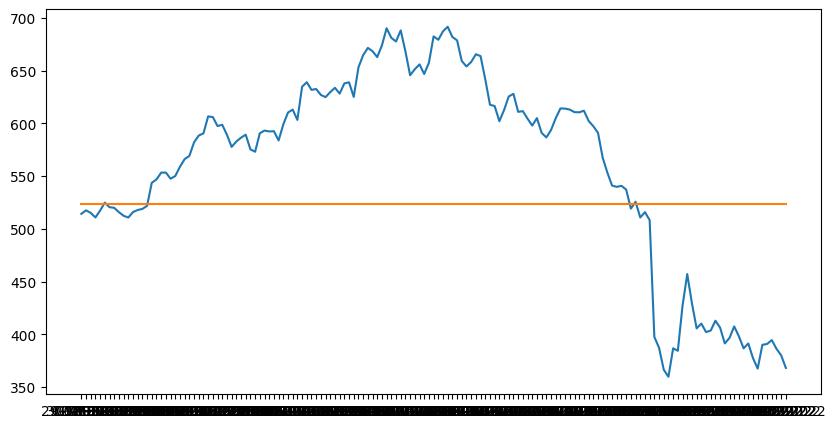

In [39]:
train_split = 0.8
split_idx = int(np.ceil(len(stock_data)*train_split))
train = stock_data[['Close']].iloc[:split_idx]
test = stock_data[['Close']].iloc[split_idx:]

test_pred = np.array([train.rolling(10).mean().iloc[-1]]*len(test)).reshape((-1,1))

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_pred)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_pred))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_pred)
plt.show()

### EMA

c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwar

Test RMSE: 100.244
Test MAPE: 0.163


c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\Paarth Agarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


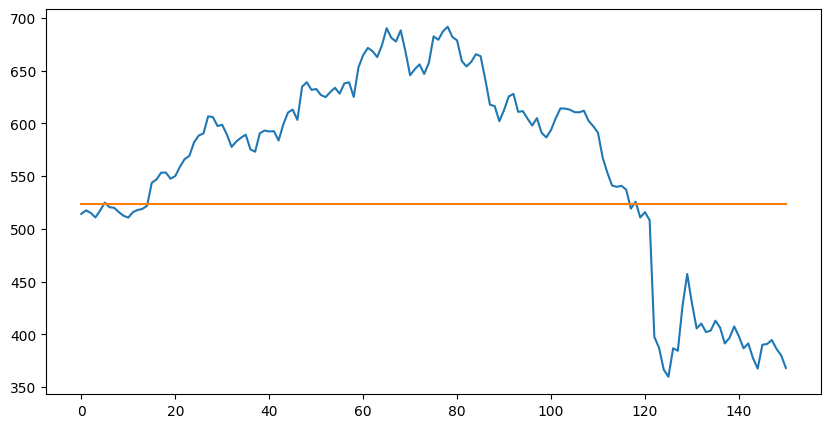

In [41]:
from statsmodels.tsa.api import SimpleExpSmoothing

X = stock_data[['Close']].values
train_split = 0.8
split_idx = int(np.ceil(len(X)*train_split))
train = X[:split_idx]
test = X[split_idx:]
test_concat = np.array([]).reshape((0,1))

for i in range(len(test)):
  train_fit = np.concatenate((train, np.asarray(test_concat)))
  fit = SimpleExpSmoothing(np.asarray(train_fit)).fit(smoothing_level=0.1)
  test_pred = fit.forecast(1)
  test_concat = np.concatenate((np.asarray(test_concat), test_pred.reshape((-1,1))))

# The change is here: Using test_concat instead of test_pred for RMSE calculation
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_concat)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_concat))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_concat)
plt.show()

### A Different Averaging

Test RMSE: 12.672
Test MAPE: 0.019


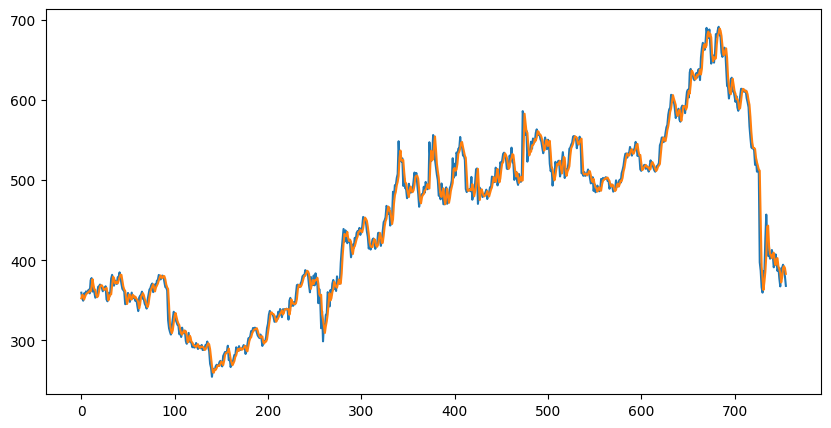

In [42]:
X = stock_data[['Close']].values
time_steps = 2

history = [X[i] for i in range(time_steps)]
ytest = [X[i] for i in range(time_steps, len(X))]
ypred_list = []

for t in range(len(ytest)):
	ypred = np.mean([history[i] for i in range(len(history)-time_steps,len(history))])
	ypred_list.append(ypred)
	history.append(ytest[t])

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(ytest, ypred_list)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(ytest, ypred_list))

plt.figure(figsize=(10,5))
plt.plot(ytest)
plt.plot(ypred_list)
plt.show()